<a href="https://colab.research.google.com/github/aliakbarbadri/nlp-tf/blob/master/week3/week3_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import io
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import json

# **Lesson 1**: imdb/subwords8k dataset

## Get dataset

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteHOJ394/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteHOJ394/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteHOJ394/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
vocab_size = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
def plot_graphs(history, string):
  pd.DataFrame({string:history.history[string],
              'val_'+string:history.history['val_'+string],
              }).plot(figsize=(8, 8))
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.grid(True)
  plt.show()

## Single Layer BiLSTM

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 73s 188ms/step - loss: 0.5234 - accuracy: 0.7370 - val_loss: 0.4378 - val_accuracy: 0.8154
Epoch 2/10
391/391 [==============================] - 73s 187ms/step - loss: 0.3587 - accuracy: 0.8543 - val_loss: 0.4311 - val_accuracy: 0.8172
Epoch 3/10
391/391 [==============================] - 71s 183ms/step - loss: 0.3025 - accuracy: 0.8802 - val_loss: 0.5012 - val_accuracy: 0.8177
Epoch 4/10
391/391 [==============================] - 71s 181ms/step - loss: 0.2458 - accuracy: 0.9072 - val_loss: 0.4467 - val_accuracy: 0.8364
Epoch 5/10
391/391 [==============================] - 70s 180ms/step - loss: 0.1895 - accuracy: 0.9303 - val_loss: 0.4661 - val_accuracy: 0.8264
Epoch 6/10
391/391 [==============================] - 71s 180ms/step - loss: 0.1461 - accuracy: 0.9485 - val_loss: 0.4771 - val_accuracy: 0.8248
Epoch 7/10
391/391 [==============================] - 71s 181ms/step - loss: 0.1272 - accuracy: 0.9552 - val_loss: 0.5609 - val_ac

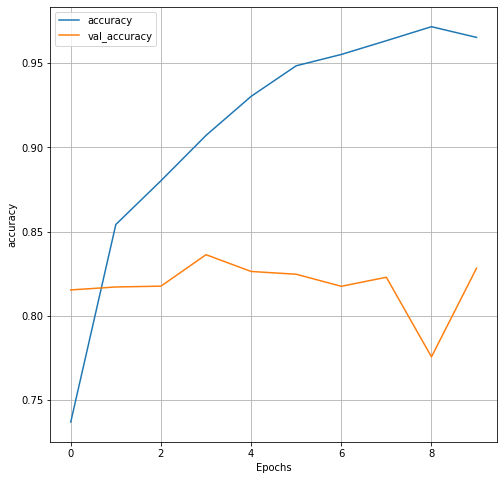

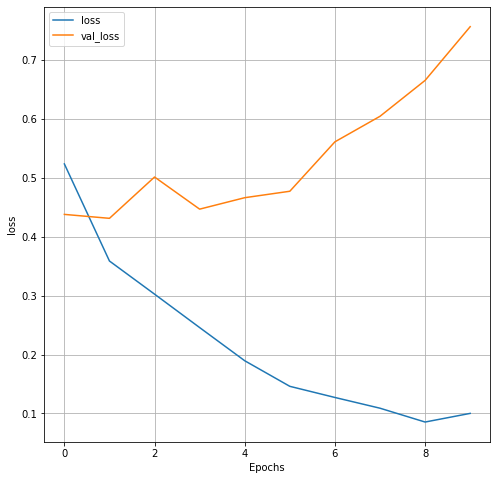

In [11]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Multiple Layer BiLSTM

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 141s 362ms/step - loss: 0.5559 - accuracy: 0.7125 - val_loss: 0.5236 - val_accuracy: 0.7492
Epoch 2/10
391/391 [==============================] - 144s 368ms/step - loss: 0.4090 - accuracy: 0.8281 - val_loss: 0.4631 - val_accuracy: 0.7862
Epoch 3/10
391/391 [==============================] - 140s 359ms/step - loss: 0.3511 - accuracy: 0.8560 - val_loss: 0.5099 - val_accuracy: 0.7564
Epoch 4/10
391/391 [==============================] - 142s 362ms/step - loss: 0.2738 - accuracy: 0.8970 - val_loss: 0.4322 - val_accuracy: 0.8202
Epoch 5/10
391/391 [==============================] - 143s 366ms/step - loss: 0.2205 - accuracy: 0.9180 - val_loss: 0.4872 - val_accuracy: 0.7952
Epoch 6/10
391/391 [==============================] - 143s 365ms/step - loss: 0.1647 - accuracy: 0.9443 - val_loss: 0.5099 - val_accuracy: 0.8212
Epoch 7/10
391/391 [==============================] - 141s 360ms/step - loss: 0.1370 - accuracy: 0.9553 - val_loss: 0.5751 -

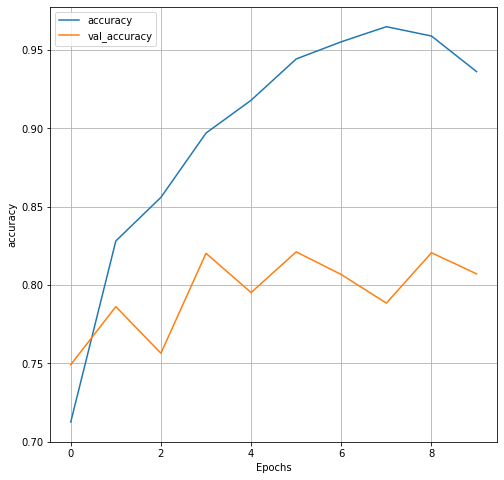

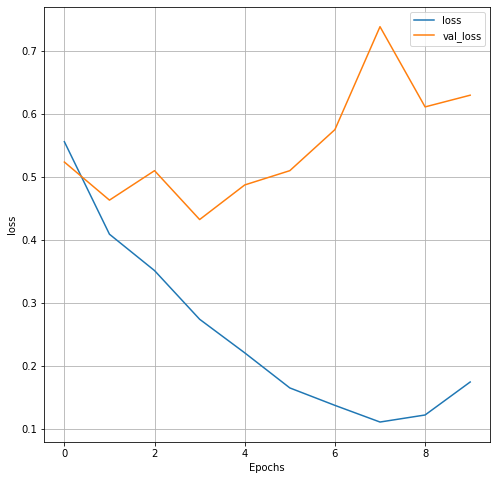

In [14]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Conv1D

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 33s 84ms/step - loss: 0.4514 - accuracy: 0.7782 - val_loss: 0.3198 - val_accuracy: 0.8764
Epoch 2/10
391/391 [==============================] - 21s 54ms/step - loss: 0.2277 - accuracy: 0.9174 - val_loss: 0.3242 - val_accuracy: 0.8738
Epoch 3/10
391/391 [==============================] - 20s 50ms/step - loss: 0.1714 - accuracy: 0.9393 - val_loss: 0.3464 - val_accuracy: 0.8679
Epoch 4/10
391/391 [==============================] - 19s 48ms/step - loss: 0.1366 - accuracy: 0.9508 - val_loss: 0.3970 - val_accuracy: 0.8661
Epoch 5/10
391/391 [==============================] - 18s 47ms/step - loss: 0.1124 - accuracy: 0.9617 - val_loss: 0.4572 - val_accuracy: 0.8648
Epoch 6/10
391/391 [==============================] - 18s 47ms/step - loss: 0.0891 - accuracy: 0.9688 - val_loss: 0.4878 - val_accuracy: 0.8616
Epoch 7/10
391/391 [==============================] - 18s 47ms/step - loss: 0.0735 - accuracy: 0.9766 - val_loss: 0.5447 - val_accuracy:

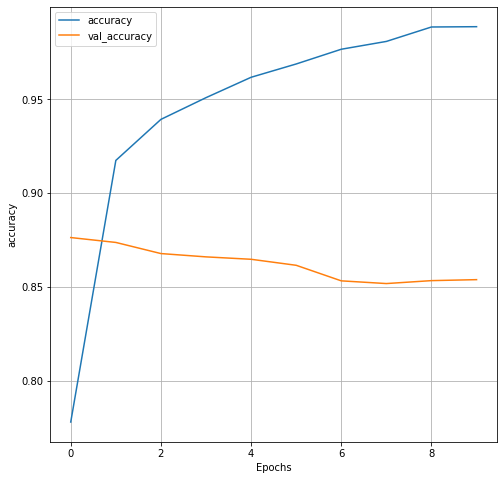

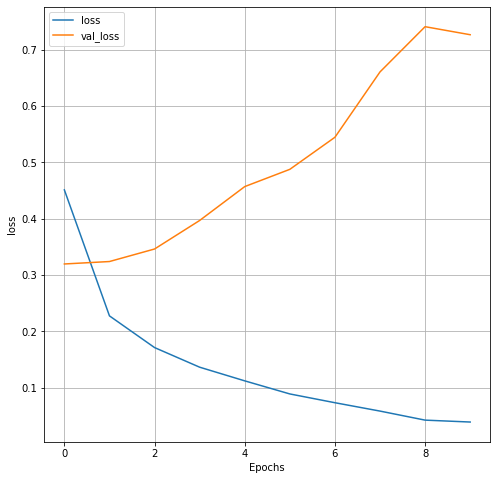

In [17]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## GRU

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [26]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete55QQ2C/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete55QQ2C/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete55QQ2C/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(padded, training_labels_final, epochs=50, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 14s 18ms/step - loss: 0.5305 - accuracy: 0.7169 - val_loss: 0.4111 - val_accuracy: 0.8148
Epoch 2/50
782/782 [==============================] - 14s 18ms/step - loss: 0.3216 - accuracy: 0.8690 - val_loss: 0.3538 - val_accuracy: 0.8490
Epoch 3/50
782/782 [==============================] - 14s 18ms/step - loss: 0.2550 - accuracy: 0.9023 - val_loss: 0.3944 - val_accuracy: 0.8410
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 0.2158 - accuracy: 0.9210 - val_loss: 0.4050 - val_accuracy: 0.8403
Epoch 5/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1817 - accuracy: 0.9345 - val_loss: 0.4384 - val_accuracy: 0.8350
Epoch 6/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1432 - accuracy: 0.9502 - val_loss: 0.4854 - val_accuracy: 0.8327
Epoch 7/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1099 - accuracy: 0.9640 - val_loss: 0.5214 - val_accuracy:

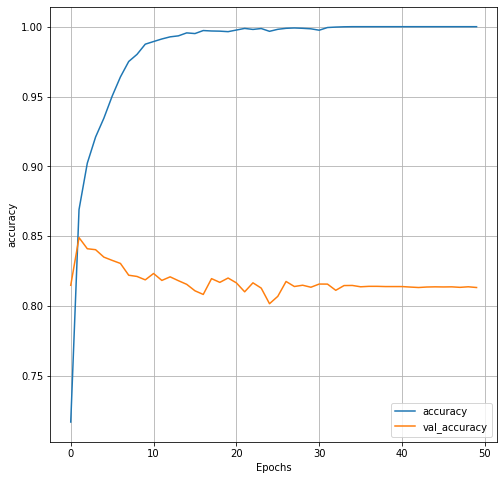

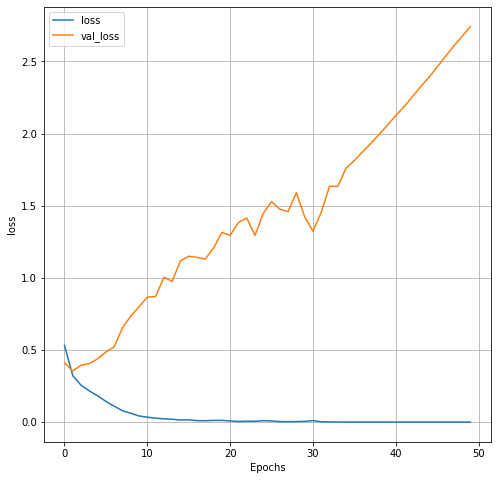

In [30]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# **Lesson 2**: Sarcasm dataset

## Get dataset

In [31]:
!wget https://raw.githubusercontent.com/aliakbarbadri/nlp-tf/master/Sarcasm_Headlines_Dataset_v2.json \
    -O /tmp/sarcasm.json

--2020-05-17 14:54:12--  https://raw.githubusercontent.com/aliakbarbadri/nlp-tf/master/Sarcasm_Headlines_Dataset_v2.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6057046 (5.8M) [text/plain]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.78M  --.-KB/s    in 0.1s    

2020-05-17 14:54:14 (39.5 MB/s) - ‘/tmp/sarcasm.json’ saved [6057046/6057046]



In [34]:
sarcasm_data = [json.loads(line) for line in open('/tmp/sarcasm.json', 'r')]
len(sarcasm_data), sarcasm_data[0]

(28619,
 {'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205',
  'headline': 'thirtysomething scientists unveil doomsday clock of hair loss',
  'is_sarcastic': 1})

In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [0]:
sentences = [] 
labels = []

for item in sarcasm_data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [0]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## BiLSTM

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_10 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(training_padded, training_labels, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
625/625 [==============================] - 10s 15ms/step - loss: 0.4571 - accuracy: 0.7701 - val_loss: 0.3839 - val_accuracy: 0.8175
Epoch 2/50
625/625 [==============================] - 9s 14ms/step - loss: 0.3613 - accuracy: 0.8355 - val_loss: 0.3699 - val_accuracy: 0.8299
Epoch 3/50
625/625 [==============================] - 9s 14ms/step - loss: 0.3332 - accuracy: 0.8490 - val_loss: 0.3595 - val_accuracy: 0.8341
Epoch 4/50
625/625 [==============================] - 9s 15ms/step - loss: 0.3150 - accuracy: 0.8597 - val_loss: 0.3561 - val_accuracy: 0.8375
Epoch 5/50
625/625 [==============================] - 9s 14ms/step - loss: 0.3019 - accuracy: 0.8695 - val_loss: 0.3743 - val_accuracy: 0.8289
Epoch 6/50
625/625 [==============================] - 9s 14ms/step - loss: 0.2938 - accuracy: 0.8714 - val_loss: 0.3719 - val_accuracy: 0.8320
Epoch 7/50
625/625 [==============================] - 9s 14ms/step - loss: 0.2848 - accuracy: 0.8751 - val_loss: 0.3656 - val_accuracy: 0.832

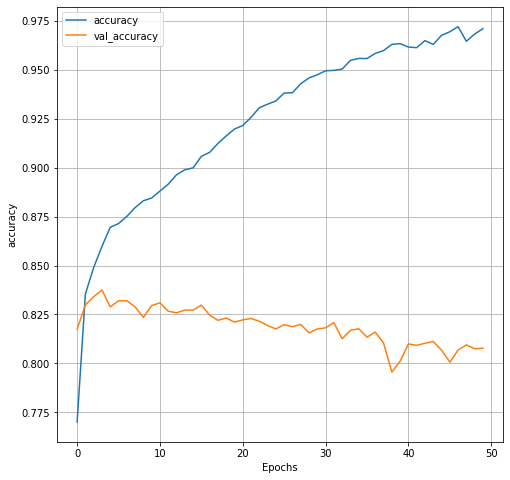

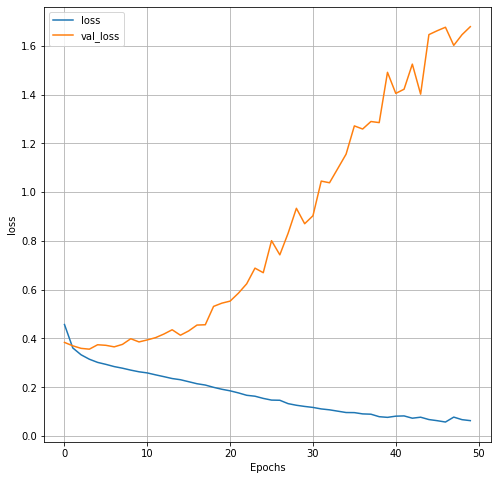

In [43]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Conv1D

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(training_padded, training_labels, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
625/625 [==============================] - 3s 4ms/step - loss: 0.4818 - accuracy: 0.7559 - val_loss: 0.3967 - val_accuracy: 0.8192
Epoch 2/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3592 - accuracy: 0.8385 - val_loss: 0.3871 - val_accuracy: 0.8197
Epoch 3/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3232 - accuracy: 0.8607 - val_loss: 0.3925 - val_accuracy: 0.8255
Epoch 4/50
625/625 [==============================] - 3s 4ms/step - loss: 0.2968 - accuracy: 0.8737 - val_loss: 0.3949 - val_accuracy: 0.8195
Epoch 5/50
625/625 [==============================] - 3s 4ms/step - loss: 0.2659 - accuracy: 0.8904 - val_loss: 0.4148 - val_accuracy: 0.8221
Epoch 6/50
625/625 [==============================] - 3s 4ms/step - loss: 0.2358 - accuracy: 0.9050 - val_loss: 0.4343 - val_accuracy: 0.8196
Epoch 7/50
625/625 [==============================] - 3s 4ms/step - loss: 0.2048 - accuracy: 0.9188 - val_loss: 0.4730 - val_accuracy: 0.8163
Epoch 

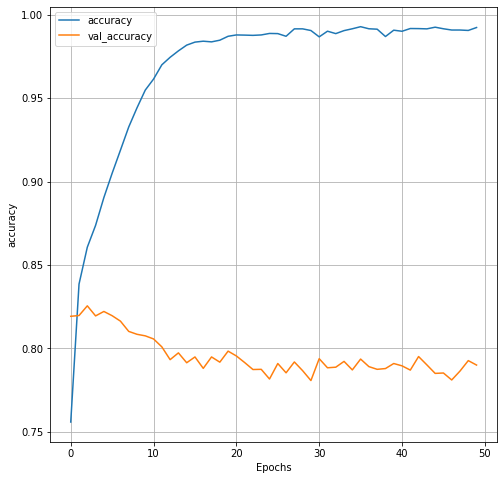

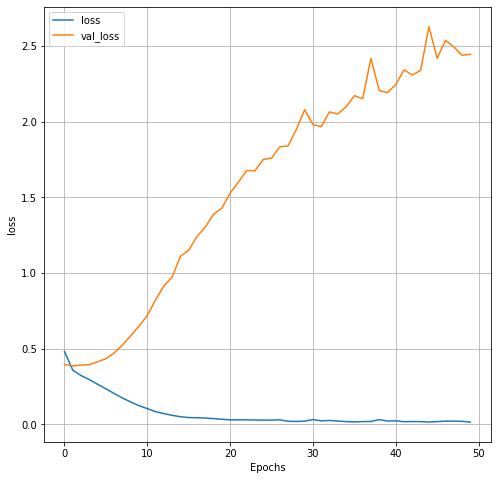

In [46]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")